# Лабораторная работа 1

## Импорты библиотек

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Подготовка данных

In [2]:
dataset = pd.read_csv('teen_phone_addiction_dataset.csv')
series = dataset['Time_on_Social_Media']
labels = dataset['School_Grade']
    
labels_num = pd.Series([int(val[:-2]) for val in labels.values])

## I.
### Рассчитайте характеристики:

- Среднее
- Дисперсия
- Мода
- Медиана
- Квантили уровня 0.25, 0.5, 0.75
- Эксцесс
- Ассиметрия
- Интерквартильный размах

In [3]:
mean = series.mean()
variance = series.var()
mode = series.mode()[0]
median = series.median()
q25 = series.quantile(0.25)
q50 = series.quantile(0.5)
q75 = series.quantile(0.75)
skewness = series.skew()
kurtosis = series.kurtosis()
iqr = q75 - q25

print(f"Статистические характеристики:")
print(f"Среднее: {mean:.2f}")
print(f"Дисперсия: {variance:.2f}")
print(f"Мода: {mode:.2f}")
print(f"Медиана: {median:.2f}")
print(f"Квантиль 0.25: {q25:.2f}")
print(f"Квантиль 0.5: {q50:.2f}")
print(f"Квантиль 0.75: {q75:.2f}")
print(f"Эксцесс: {kurtosis:.2f}")
print(f"Ассиметрия: {skewness:.2f}")
print(f"Интерквартильный размах: {iqr:.2f}")

Статистические характеристики:
Среднее: 2.50
Дисперсия: 0.98
Мода: 2.70
Медиана: 2.50
Квантиль 0.25: 1.80
Квантиль 0.5: 2.50
Квантиль 0.75: 3.20
Эксцесс: -0.21
Ассиметрия: 0.07
Интерквартильный размах: 1.40


### Построить графики:
- Гистограмма
- Эмпирическая функция распределения

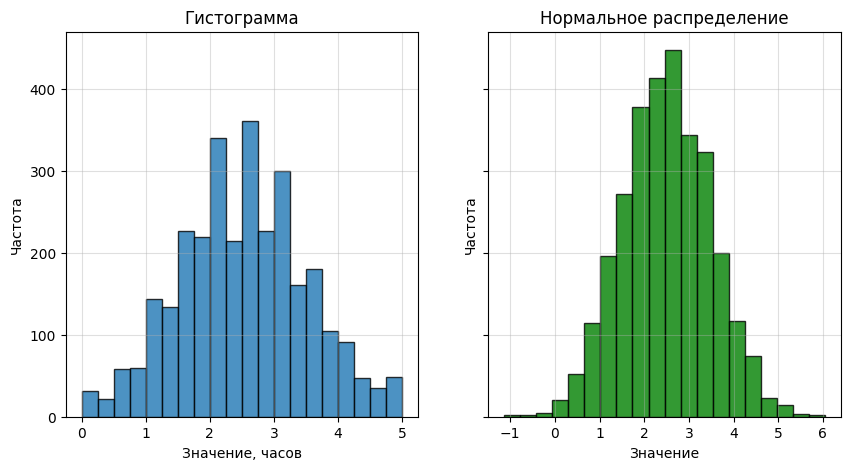

In [4]:
samples = stats.norm.rvs(loc=mean, scale=variance, size=len(series))
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 5)) 
axes[0].hist(series, bins=20, alpha=0.8, edgecolor='black')
axes[0].set_title("Гистограмма")
axes[0].grid(alpha=0.4)
axes[0].set_xlabel('Значение, часов')
axes[0].set_ylabel('Частота')

axes[1].hist(samples, bins=20, alpha=0.8, edgecolor='black', color='green')
axes[1].set_title("Нормальное распределение")
axes[1].grid(alpha=0.4)
axes[1].set_xlabel('Значение')
axes[1].set_ylabel('Частота')

plt.show()

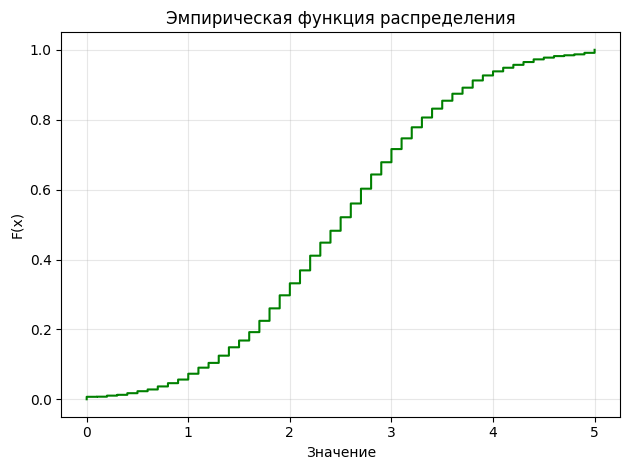

In [5]:
x = np.sort(series)
y = np.arange(1, len(series) + 1) / len(series)
plt.step(x, y, color='green')
plt.title(f'Эмпирическая функция распределения')
plt.xlabel('Значение')
plt.ylabel('F(x)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Промежуточные выводы
- Среднее время в соцсетях: 2.50
- Медиана: 2.50
- Ассиметрия: 0.07
- Эксцесс: -0.21 (более плоское распределение по сравнению с нормальным)
- Гистограмма чем-то напоминает гистограмму для нормального распределения

## II.
### Проверить данные на нормальность, используя критерии:

- Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
- Ассиметрии и эксцесса

In [21]:
def chi_square_test(data):
    """Реализация теста хи-квадрат для проверки на нормальность"""
    n_bins = int(1 + np.log2(len(data)))
    hist, bin_edges = np.histogram(data, bins=n_bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    mean = np.mean(data)
    std = np.std(data)
    
    expected = []
    for i in range(len(bin_edges) - 1):
        prob = stats.norm.cdf(bin_edges[i+1], loc=mean, scale=std) - stats.norm.cdf(bin_edges[i], loc=mean, scale=std)
        expected.append(prob * len(data))

    chi_square = sum([(hist[i] - expected[i])**2 / expected[i] for i in range(len(hist))])
    
    df = n_bins - 1 - 2
    
    p_value = 1 - stats.chi2.cdf(chi_square, df)
    
    print(f"\nРезультаты теста хи-квадрат:")
    print(f"Статистика хи-квадрат: {chi_square:.4f}")
    print(f"Степени свободы: {df}")
    print(f"p-значение: {p_value:.6f}")
    
    if p_value < 0.05:
        print("Вывод: Данные не соответствуют нормальному распределению (p < 0.05)")
    else:
        print("Вывод: Данные соответствуют нормальному распределению (p >= 0.05)")
    return chi_square, p_value

def skewness_kurtosis_test(data):
    """Тест на нормальность с использованием ассиметрии и эксцесса"""
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    n = len(data)
    se_skewness = np.sqrt(6 * (n - 2) / ((n + 1) * (n + 3)))
    se_kurtosis = np.sqrt(24 * n * (n - 2) * (n - 3) / ((n + 1) * (n + 3) * (n + 5)))
    
    z_skewness = abs(skewness) / se_skewness
    z_kurtosis = abs(kurtosis) / se_kurtosis
    
    p_skewness = 1 - stats.norm.cdf(z_skewness)
    p_kurtosis = 1 - stats.norm.cdf(z_kurtosis)
    
    print("\nРезультаты теста ассиметрии и эксцесса:")
    print(f"Ассиметрия: {skewness:.4f}, Z: {z_skewness:.4f}, p-значение: {p_skewness:.6f}")
    print(f"Эксцесс: {kurtosis:.4f}, Z: {z_kurtosis:.4f}, p-значение: {p_kurtosis:.6f}")
    
    if p_skewness < 0.05 or p_kurtosis < 0.05:
        print("Вывод: Данные не соответствуют нормальному распределению (p < 0.05)")
    else:
        print("Вывод: Данные соответствуют нормальному распределению (p >= 0.05)")
    
    return (skewness, p_skewness), (kurtosis, p_kurtosis)

In [22]:
chi_square_test(series)


Результаты теста хи-квадрат:
Статистика хи-квадрат: 68.9366
Степени свободы: 9
p-значение: 0.000000
Вывод: Данные не соответствуют нормальному распределению (p < 0.05)


(np.float64(68.93663027073944), np.float64(2.460076586885407e-11))

In [23]:
skewness_kurtosis_test(series)


Результаты теста ассиметрии и эксцесса:
Ассиметрия: 0.0669, Z: 1.4983, p-значение: 0.067026
Эксцесс: -0.2149, Z: 0.0440, p-значение: 0.482467
Вывод: Данные соответствуют нормальному распределению (p >= 0.05)


((np.float64(0.06693949989874558), np.float64(0.06702635921887712)),
 (np.float64(-0.21487391248537868), np.float64(0.4824667936417465)))

### Построить Q-Q plot

In [31]:
def qq_plot(data, title=""):
    """Строит Q-Q график для проверки на нормальность"""
    plt.figure(figsize=(8, 6))
    stats.probplot(series, dist="norm", plot=plt)
    plt.title(f"{title} Q-Q Plot")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

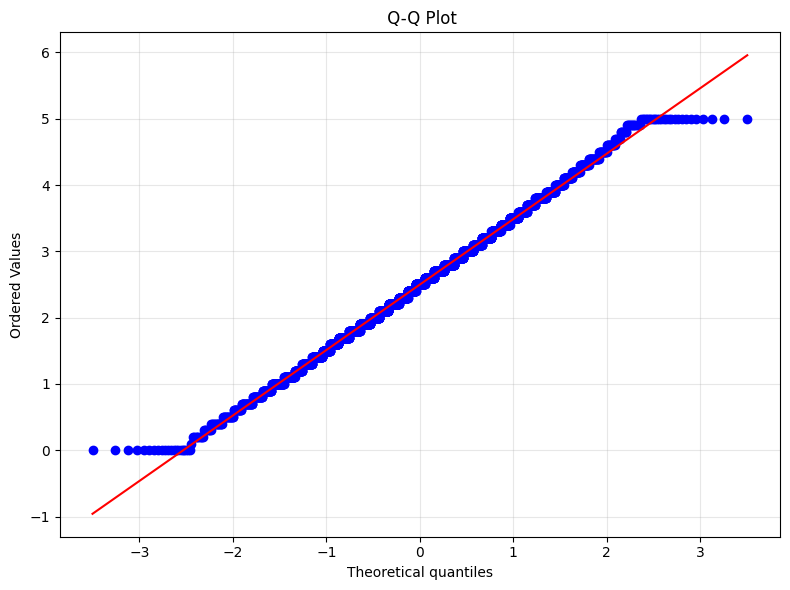

In [15]:
qq_plot(series)

### Промежуточные выводы
Исходные данные по критерию Хи-Квадрат НЕ соответствуют нормальному распределению согласно проведенным тестам

## III.
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению. Например, с помощью:

- Удаление, усечение выбросов
- Стандартизация, нормировка
- Логарифмирование и т.п.


In [8]:
# Стандартизация
series_standardized = (series - series.mean()) / series.std()

# Удаление выбросов
z_scores = stats.zscore(series)
series_clean = series[np.abs(z_scores) < 3]

# MinMax нормализация
series_normalized = (series - series.min()) / (series.max() - series.min())

### Выполните пункты I и II для обработанных данных

#### Стандартизованные данные

In [9]:
mean_standardized = series_standardized.mean()
variance_standardized = series_standardized.var()
mode_standardized = series_standardized.mode()[0]
median_standardized = series_standardized.median()
q25_standardized = series_standardized.quantile(0.25)
q50_standardized = series_standardized.quantile(0.5)
q75_standardized = series_standardized.quantile(0.75)
skewness_standardized = series_standardized.skew()
kurtosis_standardized = series_standardized.kurtosis()
iqr_standardized = q75_standardized - q25_standardized

print(f"Статистические характеристики:")
print(f"Среднее: {mean_standardized:.2f}")
print(f"Дисперсия: {variance_standardized:.2f}")
print(f"Мода: {mode_standardized:.2f}")
print(f"Медиана: {median_standardized:.2f}")
print(f"Квантиль 0.25: {q25_standardized:.2f}")
print(f"Квантиль 0.5: {q50_standardized:.2f}")
print(f"Квантиль 0.75: {q75_standardized:.2f}")
print(f"Эксцесс: {kurtosis_standardized:.2f}")
print(f"Ассиметрия: {skewness_standardized:.2f}")
print(f"Интерквартильный размах: {iqr_standardized:.2f}")

Статистические характеристики:
Среднее: -0.00
Дисперсия: 1.00
Мода: 0.20
Медиана: 0.00
Квантиль 0.25: -0.71
Квантиль 0.5: 0.00
Квантиль 0.75: 0.71
Эксцесс: -0.21
Ассиметрия: 0.07
Интерквартильный размах: 1.42


#### Данные без выбросов

In [10]:
mean_clean = series_clean.mean()
variance_clean = series_clean.var()
mode_clean = series_clean.mode()[0]
median_clean = series_clean.median()
q25_clean = series_clean.quantile(0.25)
q50_clean = series_clean.quantile(0.5)
q75_clean = series_clean.quantile(0.75)
skewness_clean = series_clean.skew()
kurtosis_clean = series_clean.kurtosis()
iqr_clean = q75_clean - q25_clean

print(f"Статистические характеристики:")
print(f"Среднее: {mean_clean:.2f}")
print(f"Дисперсия: {variance_clean:.2f}")
print(f"Мода: {mode_clean:.2f}")
print(f"Медиана: {median_clean:.2f}")
print(f"Квантиль 0.25: {q25_clean:.2f}")
print(f"Квантиль 0.5: {q50_clean:.2f}")
print(f"Квантиль 0.75: {q75_clean:.2f}")
print(f"Эксцесс: {kurtosis_clean:.2f}")
print(f"Ассиметрия: {skewness_clean:.2f}")
print(f"Интерквартильный размах: {iqr_clean:.2f}")

Статистические характеристики:
Среднее: 2.50
Дисперсия: 0.98
Мода: 2.70
Медиана: 2.50
Квантиль 0.25: 1.80
Квантиль 0.5: 2.50
Квантиль 0.75: 3.20
Эксцесс: -0.21
Ассиметрия: 0.07
Интерквартильный размах: 1.40


#### Нормализованные данные

In [11]:
mean_normalized = series_normalized.mean()
variance_normalized = series_normalized.var()
mode_normalized = series_normalized.mode()[0]
median_normalized = series_normalized.median()
q25_normalized = series_normalized.quantile(0.25)
q50_normalized = series_normalized.quantile(0.5)
q75_normalized = series_normalized.quantile(0.75)
skewness_normalized = series_normalized.skew()
kurtosis_normalized = series_normalized.kurtosis()
iqr_normalized = q75_normalized - q25_normalized

print(f"Статистические характеристики:")
print(f"Среднее: {mean_normalized:.2f}")
print(f"Дисперсия: {variance_normalized:.2f}")
print(f"Мода: {mode_normalized:.2f}")
print(f"Медиана: {median_normalized:.2f}")
print(f"Квантиль 0.25: {q25_normalized:.2f}")
print(f"Квантиль 0.5: {q50_normalized:.2f}")
print(f"Квантиль 0.75: {q75_normalized:.2f}")
print(f"Эксцесс: {kurtosis_normalized:.2f}")
print(f"Ассиметрия: {skewness_normalized:.2f}")
print(f"Интерквартильный размах: {iqr_normalized:.2f}")

Статистические характеристики:
Среднее: 0.50
Дисперсия: 0.04
Мода: 0.54
Медиана: 0.50
Квантиль 0.25: 0.36
Квантиль 0.5: 0.50
Квантиль 0.75: 0.64
Эксцесс: -0.21
Ассиметрия: 0.07
Интерквартильный размах: 0.28


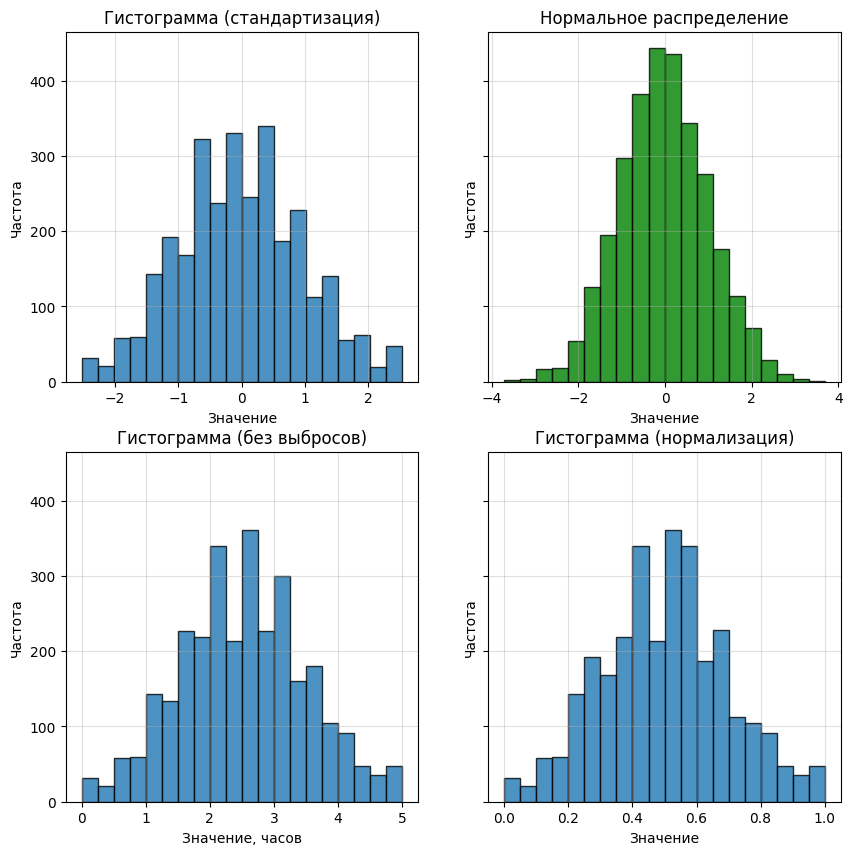

In [14]:
samples = stats.norm.rvs(loc=0, scale=1, size=len(series))
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(10, 10)) 
axes[0, 0].hist(series_standardized, bins=20, alpha=0.8, edgecolor='black')
axes[0, 0].set_title("Гистограмма (стандартизация)")
axes[0, 0].grid(alpha=0.4)
axes[0, 0].set_xlabel('Значение')
axes[0, 0].set_ylabel('Частота')

axes[0, 1].hist(samples, bins=20, alpha=0.8, edgecolor='black', color='green')
axes[0, 1].set_title("Нормальное распределение")
axes[0, 1].grid(alpha=0.4)
axes[0, 1].set_xlabel('Значение')
axes[0, 1].set_ylabel('Частота')

axes[1, 0].hist(series_clean, bins=20, alpha=0.8, edgecolor='black')
axes[1, 0].set_title("Гистограмма (без выбросов)")
axes[1, 0].grid(alpha=0.4)
axes[1, 0].set_xlabel('Значение, часов')
axes[1, 0].set_ylabel('Частота')

axes[1, 1].hist(series_normalized, bins=20, alpha=0.8, edgecolor='black')
axes[1, 1].set_title("Гистограмма (нормализация)")
axes[1, 1].grid(alpha=0.4)
axes[1, 1].set_xlabel('Значение')
axes[1, 1].set_ylabel('Частота')

plt.show()

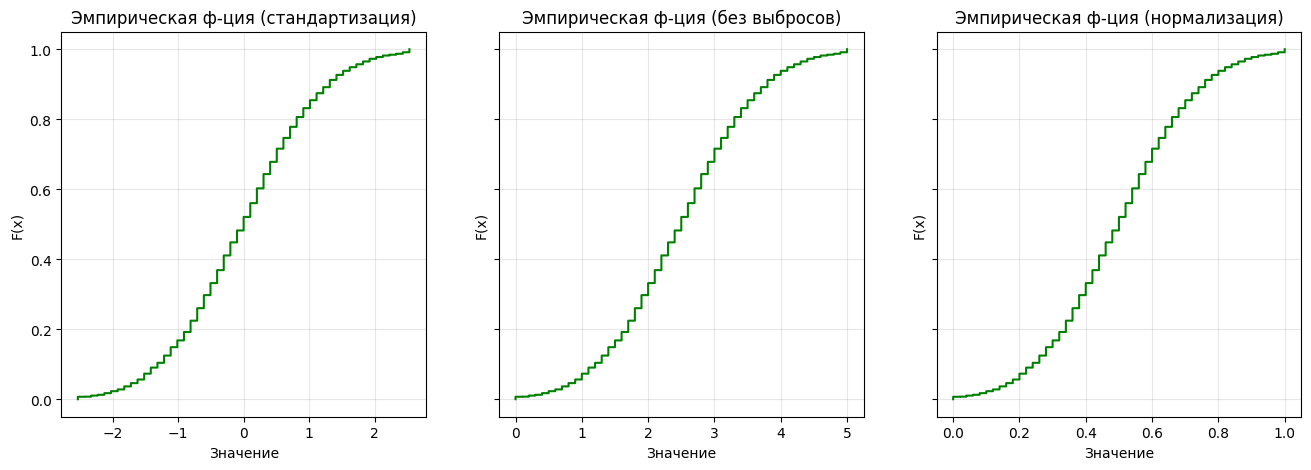

In [18]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(16, 5)) 

x_st = np.sort(series_standardized)
y_st = np.arange(1, len(series_standardized) + 1) / len(series_standardized)
axes[0].step(x_st, y_st, color='green')
axes[0].set_title(f'Эмпирическая ф-ция (стандартизация)')
axes[0].set_xlabel('Значение')
axes[0].set_ylabel('F(x)')
axes[0].grid(alpha=0.3)

x_cl = np.sort(series_clean)
y_cl = np.arange(1, len(series_clean) + 1) / len(series_clean)
axes[1].step(x_cl, y_cl, color='green')
axes[1].set_title(f'Эмпирическая ф-ция (без выбросов)')
axes[1].set_xlabel('Значение')
axes[1].set_ylabel('F(x)')
axes[1].grid(alpha=0.3)

x_n = np.sort(series_normalized)
y_n = np.arange(1, len(series_normalized) + 1) / len(series_normalized)
axes[2].step(x_n, y_n, color='green')
axes[2].set_title(f'Эмпирическая ф-ция (нормализация)')
axes[2].set_xlabel('Значение')
axes[2].set_ylabel('F(x)')
axes[2].grid(alpha=0.3)

plt.show()

#### Проверка критериев (стандартизованные данные)

In [37]:
chi_square_test(series_standardized)


Результаты теста хи-квадрат:
Статистика хи-квадрат: 58.9175
Степени свободы: 9
p-значение: 0.000000
Вывод: Данные не соответствуют нормальному распределению (p < 0.05)


(np.float64(58.91747301519264), np.float64(2.166167245576389e-09))

In [38]:
skewness_kurtosis_test(series_standardized)


Результаты теста ассиметрии и эксцесса:
Ассиметрия: 0.0669, Z: 1.4983, p-значение: 0.067026
Эксцесс: -0.2149, Z: 0.0440, p-значение: 0.482467
Вывод: Данные соответствуют нормальному распределению (p >= 0.05)


((np.float64(0.06693949989874651), np.float64(0.06702635921887445)),
 (np.float64(-0.21487391248537868), np.float64(0.4824667936417465)))

#### Проверка критериев (данные без выбросов)

In [39]:
chi_square_test(series_clean)


Результаты теста хи-квадрат:
Статистика хи-квадрат: 68.9366
Степени свободы: 9
p-значение: 0.000000
Вывод: Данные не соответствуют нормальному распределению (p < 0.05)


(np.float64(68.93663027073944), np.float64(2.460076586885407e-11))

In [40]:
skewness_kurtosis_test(series_clean)


Результаты теста ассиметрии и эксцесса:
Ассиметрия: 0.0669, Z: 1.4983, p-значение: 0.067026
Эксцесс: -0.2149, Z: 0.0440, p-значение: 0.482467
Вывод: Данные соответствуют нормальному распределению (p >= 0.05)


((np.float64(0.06693949989874558), np.float64(0.06702635921887712)),
 (np.float64(-0.21487391248537868), np.float64(0.4824667936417465)))

#### Проверка критериев (нормализованные данные)

In [41]:
chi_square_test(series_normalized)


Результаты теста хи-квадрат:
Статистика хи-квадрат: 68.9366
Степени свободы: 9
p-значение: 0.000000
Вывод: Данные не соответствуют нормальному распределению (p < 0.05)


(np.float64(68.93663027073998), np.float64(2.460076586885407e-11))

In [42]:
skewness_kurtosis_test(series_normalized)


Результаты теста ассиметрии и эксцесса:
Ассиметрия: 0.0669, Z: 1.4983, p-значение: 0.067026
Эксцесс: -0.2149, Z: 0.0440, p-значение: 0.482467
Вывод: Данные соответствуют нормальному распределению (p >= 0.05)


((np.float64(0.06693949989874662), np.float64(0.06702635921887412)),
 (np.float64(-0.21487391248537824), np.float64(0.4824667936417466)))

#### Q-Q Plot (стандартизованные данные)

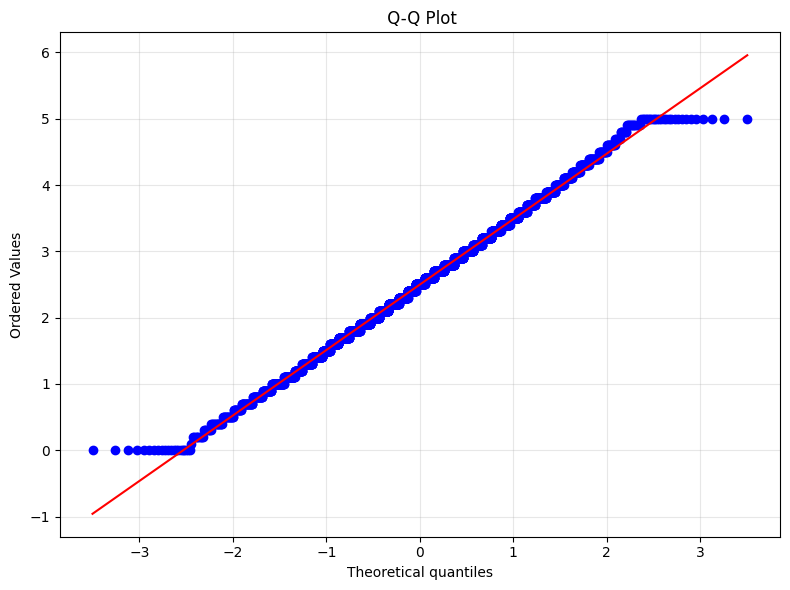

In [32]:
qq_plot(series_standardized)

#### Q-Q Plot (данные без выбросов)

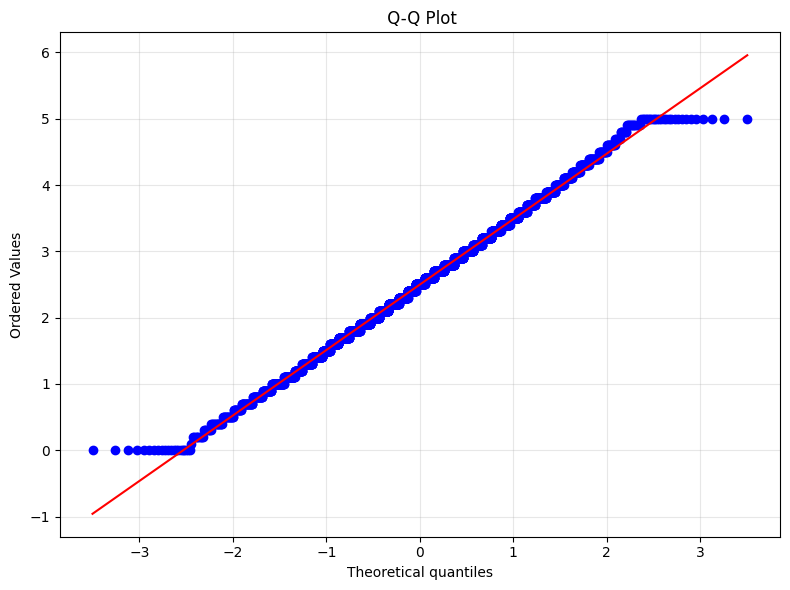

In [33]:
qq_plot(series_clean)

#### Q-Q Plot (нормализованные данные)

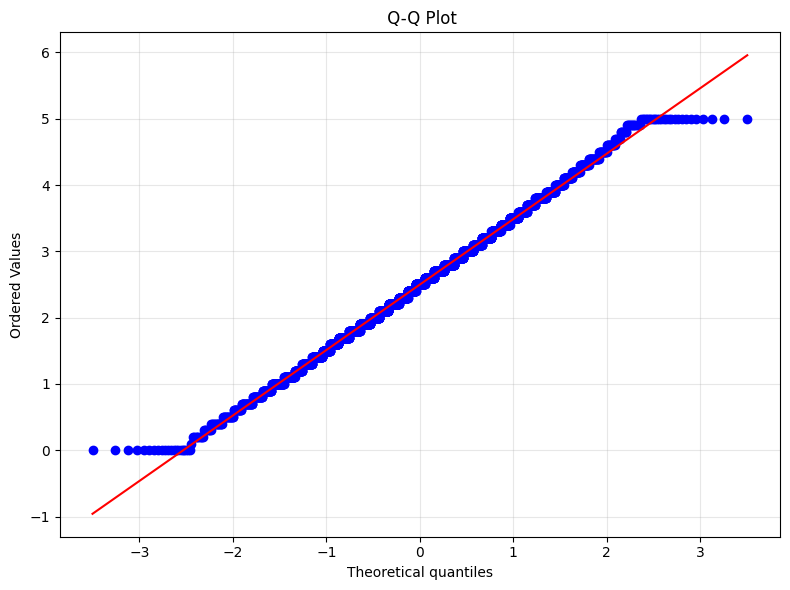

In [34]:
qq_plot(series_normalized)

### Промежуточные выводы
Из всех подходов лучше всего оказалась стандартизация, но данные всё ещё не полностью соответствуют нормальному распределению по критерию Хи-Квадрат.

## IV.
Сгруппируйте данные по столбцу 'School_Grade'.

На одном графике постройте гистограммы для каждой группы.
Рассчитайте среднее, дисперсию внутри каждой группы

#### Среднее по каждой группе

In [48]:
print(dataset.groupby(['School_Grade'])['Time_on_Social_Media'].mean())

School_Grade
10th    2.524025
11th    2.487891
12th    2.463894
7th     2.540040
8th     2.469917
9th     2.510456
Name: Time_on_Social_Media, dtype: float64


#### Дисперсия в каждой группе

In [49]:
print(dataset.groupby(['School_Grade'])['Time_on_Social_Media'].var())

School_Grade
10th    0.922734
11th    0.945878
12th    1.013978
7th     0.919583
8th     1.030382
9th     1.025967
Name: Time_on_Social_Media, dtype: float64


#### Построение гистограммы

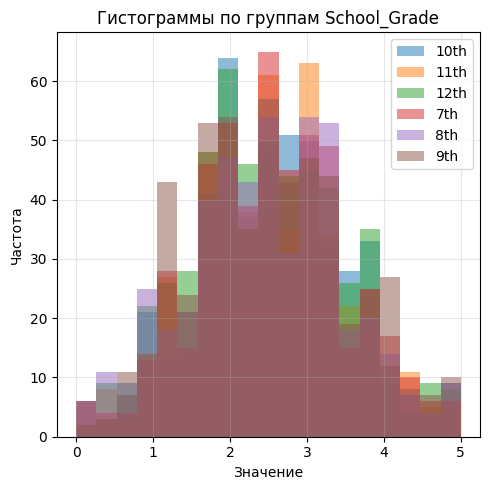

In [44]:
groups = dataset.groupby(['School_Grade'])
all_data = []
labels = []
for name, group in groups:
    data = group['Time_on_Social_Media']
    labels.append(name)
    all_data.append(data)
    
plt.figure(figsize=(5, 5))
all_values = series
bins = np.linspace(all_values.min(), all_values.max(), 20)

for i, data in enumerate(all_data):
    plt.hist(data, bins=bins, alpha=0.5, label=labels[i])

plt.title(f'Гистограммы по группам School_Grade')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Промежуточные выводы
Различия между группами обучающихся относительно небольшие


## V.
### После каждого пункта сделайте промежуточные выводы:

- Опишите полученные числовые характеристики и графики
- Являются ли данные нормальными
- Эффект от обработки данных (удалось ли привести данные к нормальному виду)
- Различия распределений внутри разных групп 'School_Grade'